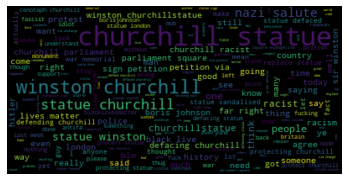

Finished


In [4]:
'''
Module for creating a world cloud of data in the HeritageScrape/modified folder.

Created on Jun 28, 2020

@author: mark
'''
import os
import sys
import csv
from os import listdir
import datetime

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

class Wordcloud():

    '''
    Method to load word cloud data from a start and end date.
    
    @param start- the start date of a word cloud
    @param end- the end date of a word cloud
    '''
    def loadData(self, start, end):
        
        #the path to the modified data folder
        pn=os.path.abspath("")
        pn=pn.split("src")[0]  
        directory=os.path.join(pn,'modified')
      

        #open the file(s) in the modified directory
        try:
            for f in listdir(directory):
                
                texts=''
                
                #should only be .csv files
                if '.csv' not in f:
                    continue
                
             
                #open individual files
                with open(os.path.join(directory,f),'r') as csvfile:
                    reader = csv.DictReader(csvfile)
                    
                    #read the rows of data
                    for row in reader:
                        
                        #read the modified (cleaned) tweet 
                        text=row['Text']
                        
                        #get the date
                        date_time=row['Datetime'].split(" ")[0]
                        
                        #convert the date to a date object
                        date_time_obj = datetime.datetime.strptime(date_time, '%Y-%m-%d')
                        
                        #the start time converted to a date object
                        st = datetime.datetime.strptime(start, '%Y-%m-%d')
                        
                        #the end time converted to a date object
                        ed = datetime.datetime.strptime(end, '%Y-%m-%d')
                        
                        #put the date back into the row
                        row['Datetime']=date_time_obj.date()
                        
                        #check to see if the date is on or after the start date and before the end date
                        if st<=date_time_obj:
                            if  ed>date_time_obj:
                                texts+=" "+text
                
                #run the word cloud      
                self.wordCloud(texts)
        except IOError:
            print ("Could not read file:", csvfile)
    
    '''
    Method to create a word cloud based on input text.
    
    @param text- the input text to create a word cloud
    '''  
    def wordCloud(self,text):
       
        # Create and generate a word cloud image:
        wordcloud = WordCloud().generate(text)

        #   Display the generated image:
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    
    '''
    Method to run word cloud based on user input
    '''     
    def run(self):
        self.loadData("2020-06-01","2020-06-30")
        print('Finished')

'''
Method to launch the main run
'''
if __name__ == '__main__':
    wc=Wordcloud()
    wc.run()